In [1]:
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy import ndimage
from skimage.morphology import label
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
# Input data files are available in the "../input/" directory.
#Simple CNN keras
from keras.layers import Lambda
from keras.models import Model , load_model
from keras.models import Sequential
from keras.layers import concatenate
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D 
from keras.losses import binary_crossentropy
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2DTranspose
from keras import backend as K

In [4]:
import tensorflow as tf
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from subprocess import check_output
import os

In [5]:
from skimage.transform import rescale, resize, downscale_local_mean
# Any results you write to the current directory are saved as output.

In [6]:
train_dir = "/input/stage1_train"

In [7]:
train_images = [i for i in os.listdir(train_dir)]

In [8]:
len(train_images)

670

In [9]:
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']

In [10]:
messy_masks = ['a09ae9559f817b104e049e5bb01cf4ad1b87e3ef7fad3dcf932b6585ca3edc05']

In [11]:
final_images = []

for dirs in train_images:
    final_images.append(plt.imread(train_dir + '/' + dirs + '/' + 'images/' + dirs+ '.png'))

    

In [12]:
label_masks = []
for j,dirs in enumerate(train_images):
    print(dirs)
    maximum = np.zeros(final_images[j].shape[0:2])
    for i,img in enumerate(os.listdir(train_dir +'/' +dirs + "/" + "masks/")):
        if img == ".DS_Store":
             continue
        else:
            image = plt.imread(train_dir + '/' + dirs + "/" + "masks/" + img)
            print(image.shape)
            maximum = np.maximum(maximum,image)
    label_masks.append(maximum)

52a6b8ae4c8e0a8a07a31b8e3f401d8811bf1942969c198e51dfcbd98520aa60
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
ec486143ecfec847c22cd8cbc207d85312bcf38e61c9b9a805e0d12add62da8d
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
c7d546766518703580f63d5d8f11d54971044753f53c0b257d19c2f99d4bfdd0
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
3ab9cab6212fabd723a2c5a1949c2ded19980398b56e6080978e796f45cbbc90
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
27c30f9011492f234e4587c9a4b53c787037d486f658821196fe354240ac3c47
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
f73e37957c74f554be132986f38b6f1d75339f636dfe2b681a0cf3f88d2733af
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
aa4d989d262c618ac2793579e200cc71b3767f84698ae5f669867f23cdfe2568
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
4

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
673baf65ae5c571d6be452eb41e79ef3fc2eb3fd238e621c6b7621763b429989
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
af6b6173c59450bc76b2cc461cf233921fbfdb6feb8dd6da03a0d44193221fd0
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
212b858a66f0d23768b8e3e1357704fc2f4cf4bbe7eed8cd59b5d01031d553e6
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(5

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
14cc1424c59808274e123db51292e9dbb5b037ef3e7c767a8c45c9ac733b91bf
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921
(256, 256)
(256, 256)
7c0157913223365720209ac83ff2e0b1b2b460173acd615c67646014093a2b97
(360, 360)
(360, 360)
(360, 360)
(3

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603

(256, 256)
(256, 256)
(256, 256)
(256, 256)
3bfd6bb152310f93daa6f4e1867c10572946e874b3a30c9ba8e0fcdeb590300b
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
9fb32aba1c2fd53273dca9abefac944ba747f578da82dfaa1249f332a2324944
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
bf7691b0a79811fa068b7408cbce636a73f01ef9e971a95da1a2d96df73782b6
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
cbca32daaae36a872a11da4eaff65d1068ff3f154eedc9d3fc0c214a4e5d32bd
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)


(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb5acb7fb352f7030063
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
1c8b905c9519061d6d091e702b45274f4485c80dcf7fb1491e6b2723f5002180
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
6bd330234b763b77796d4804de8e224881c0fc8dd02650fa708b2edfd8c7461f
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
c1afe66cd139f996fd984f5f2622903730ec2f1192d90608154f07f7ef6cdb4b
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
a3a1b8f9794ef589b71faa9f35fd97ad6761c4488718fbcf766e95e31afa8606
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
7ba20aa731cc21af74a8d940254176cbad1bdc44f240b550341c6d9c27509daa
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(25

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
45cc00f2ef95da6698bf590663e319d7c0ed4fb99d42dd3cf4060887da74fb81
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
4c465a54e329ec7b0f4bc5f6acdfd3192707d6c0fbdf557339485581c5a6b3c1
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
ee927e8255096971ddae1bd975cf80c4ad7c847c82d0b5f5dd2ddfe5407007ee
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
5b12df18e4ae4df5af06052584cf0e6bef58ee2a220653890636eef88a944e14
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
9586e48a9a4353f11898a6a4b7475a91574e8af82e99c4b7a5e1f1b18f345f7a
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
fd8065bcb1afdbed19e028465d5d00cd2ecadc4558de05c6fa28bea3c817aa22
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
45f059cf21d85ecfce0eb93260516f1e2443d210e9a52f9ae2271d604aa3fcc5
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
fc5452f612a0f972fe55cc677055ede662af6723b5c1615ad539b8a4bd279bdb
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
6c67b78e8164801059375ed9a607f61e67a7ae347e92e36a7f20514224541d56
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(

(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
5419302571113e9aa74c7c0a9575333ca539b871a16c86ee92b35170b4ddc52e
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
1631352dbafb8a90f11219fffd3bea368a30bc3bad3bbe0e84e19bd720df4945
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
8a26b134fe9343c0c794513dae7787b7ac1debec3bb2a7096ab0b874a31d8175
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(2

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
ad473063dab4bf4f2461d9a99a9c0166d4871f156516d9e0a523484e7cf2258d
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)


(512, 640)
(512, 640)
(512, 640)
6b61ab2e3ff0e2c7a55fd71e290b51e142555cf82bc7574fc27326735e8acbd1
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
8e507d58f4c27cd2a82bee79fe27b069befd62a46fdaed20970a95a2ba819c7b
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
a7f767ca9770b160f234780e172aeb35a50830ba10dc49c526f4712451abe1d2
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
718751b439c05bdd589f04fcef321a86be3ecb35292a435138e295e05eb2e771
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(2

(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
4c032609d377bd980e01f888e0b298600bf8af0e33c4271a1f3aaf76964dce06
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
d1ba6089cae2f90cb7275ece10ca393c25f60ea17e5c9c3cea2399d31fd41869
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
a5e695fce80dc03efb6665a9ec14500ab47f4ee9f6437531388dd3cc32c90db1
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(5

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
5488e8df5440ee5161fdfae3aeccd2ee396636430065c90e3f1f73870a975991
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)


(256, 320)
(256, 320)
d0f2a00d3155c243048bc48944aef93fb08e2258d1fa5f9ccadd9140082bc22f
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
308084bdd358e0bd3dc7f2b409d6f34cc119bce30216f44667fc2be43ff31722
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
9620c33d8ef2772dbc5bd152429f507bd7fafb27e12109003292b671e556b089
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)


(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5bc3382f8df9355443d
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
2e2d29fc44444a85049b162eb359a523dec108ccd5bd75022b25547491abf0c7
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
958114e5f37d5e1420b410bd716753b3e874b175f2b6958ebf1ec2bdf776e41f
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(5

(256, 256)
dbbfe08a52688d0ac8de9161cbb17cb201e3991aacab8ab8a77fe0e203a69481
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
2349e95ece2857c89db7e4a8be8c88af0b45f3c4262608120cb3bd6ef51fd241
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
92f31f591929a30e4309ab75185c96ff4314ce0a7ead2ed2c2171897ad1da0c7
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
3ca8181367fc1258a418f7bf5044533c83e02a59c1a96def043295c429c297a8
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(360, 360)
(36

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
(603, 1272)
34c9f4eb2af8b8f46b1d88b74bde16f4614cd08948c2f1d817eb629afc512e7a
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
bb61fc17daf8bdd4e16fdcf50137a8d7762bec486ede9249d92e511fcb693676
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
3ebd2ab34ba86e515feb79ffdeb7fc303a074a98ba39949b905dbde3ff4b7ec0
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(

(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)


(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
3bfa8b3b01fd24a28477f103063d17368a7398b27331e020f3a0ef59bf68c940
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
f7e5dcfc9c93183c668c5a4ab028d5faad54fb54298711f2caae0508aa978300
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
1d4a5e729bb96b08370789cad0791f6e52ce0ffe1fcc97a04046420b43c851dd
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
88d5a03f8ecd459f076a06e0d5035149193bfdd727c30905de19054dcb9018ae
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff
(256, 256)
(2

(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
97158b2fe38783d88d4e44ba1b7bc6c84f225f8b35fcccc2f9265c65f14e7c8b
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)
(520, 696)

(520, 696)
(520, 696)
a3a65623e079af7988b0c1cf1e54041003c6d730c91ecf200b71c47b93a67ed6
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
5ddbfba2519484316e4b7ccabfa605e6e6fd96c3d87ac8cdfd2c134571a15311
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
853a4c67900c411abd04467f7bc7813d3c58a5f565c8b0807e13c6e6dea21344
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
4590d7d47f521df62f3bcb0bf74d1bca861d94ade614d8afc912d1009d607b94
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(256, 320)
(25

In [13]:
#Sanity check
for i in range(len(label_masks)):
    if label_masks[i].shape != final_images[i].shape[0:2]:
        print(i)
        print(label_masks[i].shape)
        print(final_images[i].shape)
        print("np")
    else:
        continue

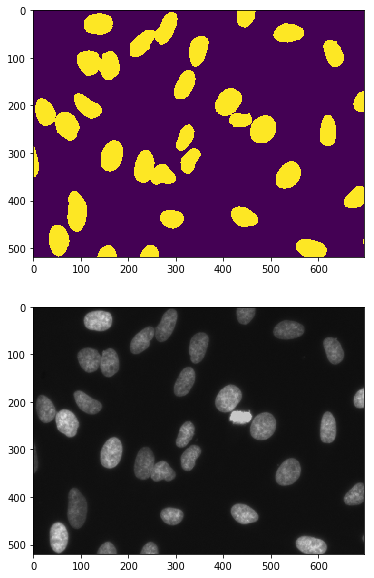

In [15]:
plt.figure(1,figsize= (10,10))
plt.subplot(2,1,1)
plt.imshow(label_masks[20])
plt.subplot(2,1,2)
plt.imshow(final_images[20])

In [14]:
label_masks = np.array(label_masks)

In [16]:
final_images = np.array(final_images)

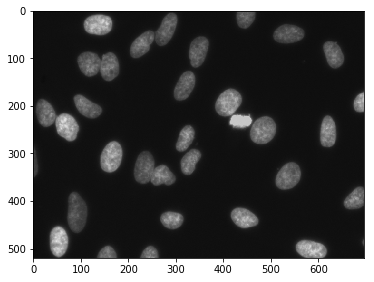

In [17]:
plt.figure(1.,figsize = (10,10))
#plt.subplot(2,1,1)
#plt.imshow(label_masks[20])
plt.subplot(2,1,1) 
plt.imshow(final_images[20])

In [18]:
label_masks[20].shape

(256, 256)

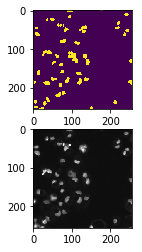

In [19]:
plt.figure(1)
plt.subplot(2,1,1)
plt.imshow(label_masks[10])
plt.subplot(2,1,2) 
plt.imshow(final_images[10])

In [18]:
#Removing bad images
final_images = list(final_images)
label_masks = list(label_masks)
bad_images = ['7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80','b1eb0123fe2d8c825694b193efb7b923d95effac9558ee4eaf3116374c2c94fe','9bb6e39d5f4415bc7554842ee5d1280403a602f2ba56122b87f453a62d37c06e','58c593bcb98386e7fd42a1d34e291db93477624b164e83ab2afa3caa90d1d921']
for i,dirs in enumerate(train_images):
    if dirs in bad_images:
        final_images.pop(i)
        label_masks.pop(i)

In [19]:
len(final_images) == len(label_masks)

True

In [20]:
final_images = np.array(final_images)
label_masks = np.array(label_masks)

In [21]:
#Data Augumentation
aug_images = []
aug_masks = []
for i in range(len(final_images)):
    if i%4 == 0:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 1:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][0:temp_shape[0]//2,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][0:temp_shape[0]//2,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 2:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,temp_shape[1]//2:,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,temp_shape[1]//2:]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)
    elif i%4 == 3:
        temp_shape = final_images[i].shape
        temp_image = final_images[i][temp_shape[0]//2:,0:temp_shape[1]//2,:]
        temp_mask = label_masks[i][temp_shape[0]//2:,0:temp_shape[1]//2]
        aug_images.append(temp_image)
        aug_masks.append(temp_mask)

In [22]:
print(aug_images[1].shape)
print(final_images[1].shape)

(128, 128, 4)
(256, 256, 4)


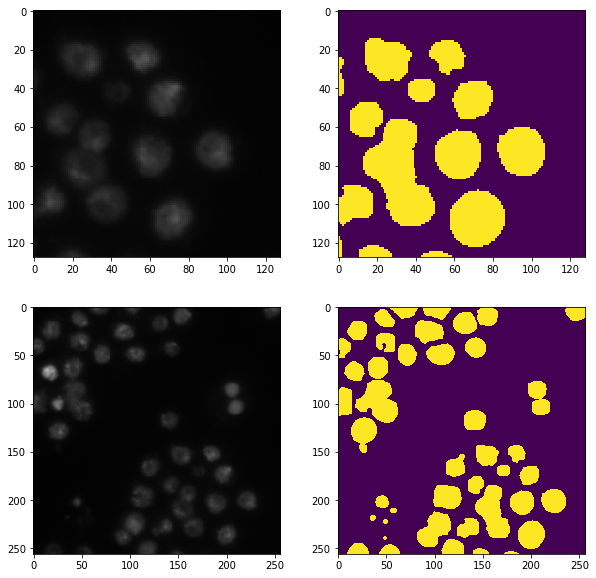

In [30]:
plt.figure(1,figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(aug_images[2])
plt.subplot(2,2,2)
plt.imshow(aug_masks[2])
plt.subplot(2,2,3)
plt.imshow(final_images_final[2])
plt.subplot(2,2,4)
plt.imshow(label_masks_final[2])

In [24]:
final_images_final = np.concatenate([final_images,aug_images])

In [25]:
label_masks_final = np.concatenate([label_masks,aug_masks])

In [31]:
len(label_masks_final)

1332

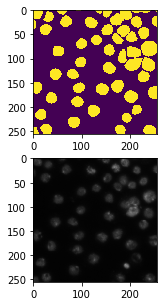

In [32]:
plt.figure(1 ,figsize = (5,5))
plt.subplot(2,1,1)
plt.imshow(np.squeeze(label_masks[61]))
plt.subplot(2,1,2) 
plt.imshow(final_images[61])

In [33]:
for  i in range(len(label_masks_final)):
    try:
        final_images_final[i] = resize(final_images_final[i] , (256,256,3) , preserve_range=True)
        label_masks_final[i] = resize(label_masks_final[i] , (256,256,1) , preserve_range=True)
    except:
        print(final_images_final[i].shape)
        

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [34]:
final_images_final = np.stack(final_images_final)
label_masks_final = np.stack(label_masks_final)

In [35]:
print(final_images_final.shape)
print(label_masks_final.shape)

(1332, 256, 256, 3)
(1332, 256, 256, 1)


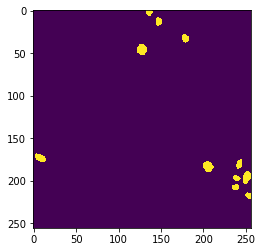

In [36]:
plt.imshow(np.squeeze(label_masks_final[1]))

In [37]:
#Ones and Zeros
for i in range(len(label_masks_final)):
    label_masks_final[i][label_masks_final[i] > 0.5] = 1
    label_masks_final[i][label_masks_final[i] <= 0.5] = 0
    

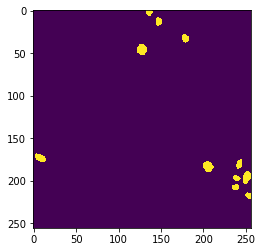

In [38]:
plt.imshow(np.squeeze(label_masks[1]))

In [39]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [40]:
# Build U-Net model
inputs = Input((256, 256, 3))
s = inputs

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[my_iou_metric])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 256, 256, 16)  448         input_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 256, 256, 16)  0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 256, 256, 16)  2320        dropout_1[0][0]                  
___________________________________________________________________________________________

In [41]:
earlystopper = EarlyStopping(monitor = 'val_loss',patience=5, verbose=1)

In [42]:
label_masks_final.shape

(1332, 256, 256, 1)

In [43]:
#checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', monitor = 'val_loss',verbose=1, save_best_only=True)

In [ ]:
results = model.fit(final_images_final, label_masks_final, validation_split=0.1, batch_size=40, epochs=30 ,callbacks=[earlystopper],verbose = 1)

Train on 1198 samples, validate on 134 samples
Epoch 1/30
1198/1198 [==============================] - 155s - loss: 0.3502 - my_iou_metric: 0.0270 - val_loss: 0.2924 - val_my_iou_metric: 0.0471
Epoch 2/30
1198/1198 [==============================] - 45s - loss: 0.2080 - my_iou_metric: 0.1363 - val_loss: 0.1555 - val_my_iou_metric: 0.2366
Epoch 3/30
1198/1198 [==============================] - 45s - loss: 0.1337 - my_iou_metric: 0.2268 - val_loss: 0.2060 - val_my_iou_metric: 0.2269
Epoch 4/30
1198/1198 [==============================] - 45s - loss: 0.1259 - my_iou_metric: 0.2832 - val_loss: 0.1162 - val_my_iou_metric: 0.3226
Epoch 5/30
1198/1198 [==============================] - 45s - loss: 0.1121 - my_iou_metric: 0.3226 - val_loss: 0.1001 - val_my_iou_metric: 0.3443
Epoch 6/30
1198/1198 [==============================] - 45s - loss: 0.1118 - my_iou_metric: 0.3130 - val_loss: 0.1241 - val_my_iou_metric: 0.3506
Epoch 7/30
1198/1198 [==============================] - 45s - loss: 0.1041 -

In [1]:
plt.plot(results.history['my_iou_metric'])
plt.plot(results.history['val_my_iou_metric'])
plt.title('model iou_metric')
plt.ylabel('iou')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['my_iou_metric'])
plt.plot(results.history['val_my_iou_metric'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [47]:
#reading test set
test_dir = os.listdir("/input/stage1_test")

In [48]:
len(test_dir)

65

In [49]:
test_images = []
size_test = []
for dirs in test_dir:
    test_images.append(plt.imread("../input/stage1_test/"+ dirs + "/" + "images"+"/"+os.listdir("../input/stage1_test/"+ dirs + "/" + "images")[0]))
for i in range(len(test_images)):
    size_test.append([test_images[i].shape[0], test_images[i].shape[1]])
    test_images[i] = resize(test_images[i] , (256,256,3))
    

/usr/local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [50]:
test_images = np.array(test_images)
print(test_images.shape)

(65, 256, 256, 3)


In [51]:
prediction = model.predict(test_images)

In [48]:
prediction[prediction >= 0.5] = 1
prediction[prediction < 0.5] = 0

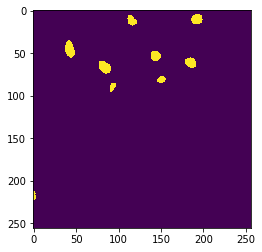

In [63]:
plt.imshow(np.squeeze(preds_test_upsampled[4]))

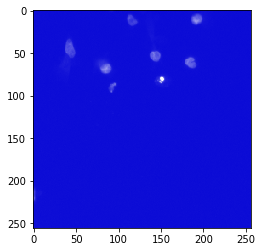

In [65]:
plt.imshow(np.squeeze(test_images[3]))

In [56]:
preds_test_upsampled = []
for i in range(len(prediction)):
    preds_test_upsampled.append(resize(np.squeeze(prediction[i]), 
                                       (size_test[i][0], size_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [57]:
np.unique(prediction[1])

array([  3.34379661e-06,   3.42693988e-06,   4.68855706e-06, ...,
         9.82789874e-01,   9.82972860e-01,   9.84146833e-01], dtype=float32)

In [57]:
preds_test_upsampled[1].shape

(256, 256)

In [58]:
preds_test_upsampled[preds_test_upsampled >= 0.5] = 1
preds_test_upsampled[preds_test_upsampled < 0.5] = 0

TypeError: unorderable types: list() >= float()

In [ ]:
plt.imshow(np.squeeze(prediction[1]))

In [ ]:
plt.imshow(np.squeeze(preds_test_upsampled[1]))

In [58]:
for i in range(len(preds_test_upsampled)):
    preds_test_upsampled[i][preds_test_upsampled[i] > 0.5] = 1
    preds_test_upsampled[i][preds_test_upsampled[i] <= 0.5] = 0

In [ ]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [ ]:
list(rle_encoding(preds_test_upsampled[0]))

In [ ]:
new_test_ids = []
rles = []
for n, id_ in enumerate(test_dir):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

In [ ]:
len(np.unique(new_test_ids))

In [1]:
sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('submit_final.csv', index=False)

NameError: name 'pd' is not defined

In [2]:
import numpy 

In [5]:
X = np.random.rand(500,)

In [7]:
Y = np.random.rand(500,)

In [9]:
model = Sequential()

In [19]:
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Train on 334 samples, validate on 166 samples
Epoch 1/150
334/334 [==============================] - 1s 2ms/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 2/150
334/334 [==============================] - 0s 420us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 3/150
334/334 [==============================] - 0s 440us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 4/150
334/334 [==============================] - 0s 322us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.0000e+00
Epoch 5/150
334/334 [==============================] - 0s 323us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6935 - val_acc: 0.0000e+00
Epoch 6/150
334/334 [==============================] - 0s 385us/step - loss: 0.6931 - acc: 0.0000e+00 - val_loss: 0.6936 - val_acc: 0.0000e+00
Epoch 7/150
334/334 [==============================] - 0s 407us/step - loss: 0.6930 - acc: 0.0000e

Epoch 114/150
334/334 [==============================] - 0s 346us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 115/150
334/334 [==============================] - 0s 374us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6925 - val_acc: 0.0000e+00
Epoch 116/150
334/334 [==============================] - 0s 349us/step - loss: 0.6919 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 117/150
334/334 [==============================] - 0s 366us/step - loss: 0.6920 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 118/150
334/334 [==============================] - 0s 382us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6922 - val_acc: 0.0000e+00
Epoch 119/150
334/334 [==============================] - 0s 371us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_acc: 0.0000e+00
Epoch 120/150
334/334 [==============================] - 0s 380us/step - loss: 0.6918 - acc: 0.0000e+00 - val_loss: 0.6923 - val_a

In [24]:
len(history.history['val_loss'])

150

In [57]:
x = np.arange(15100)
plt.figure(1)
plt.plot(history.history['val_loss'])
plt.xticks(np.arange(min(x), max(x)+1, 10.0))

([<matplotlib.axis.XTick at 0x12fc5e2e8>,
  ...],
 <a list of 1510 Text xticklabel objects>)

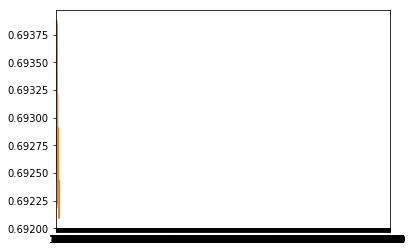

In [58]:
plt.show()